## Session 3 - more image processing

In [ ]:
# sudo apt-get update
# sudo apt-get install -y python3-opencv
# pip install opencv-python matplotlib

In [11]:
import matplotlib

In [14]:
import os
import sys
sys.path.append("..")

#Opencv
import cv2
#loading some utility functions
from utils.imutils import jimshow as show

ModuleNotFoundError: No module named 'utils.imutils'

In [13]:
import os
import glob
sys.path.append("..")
import sys
import cv2 # openCV
import numpy as np

# class util functions
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'utils.imutils'

In [4]:
filepath = os.path.join("..",
                        "..",
                        "..",
                        "cds-vis-data",
                        "data", 
                        "img",
                        "terasse.jpeg")

image = cv2.imread(filepath)
show(image)

In [7]:
image.shape # (1576, 1200, 3)

(1576, 1200, 3)

### Grayscale histogram

In [ ]:
# converting to grayscale
greyed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

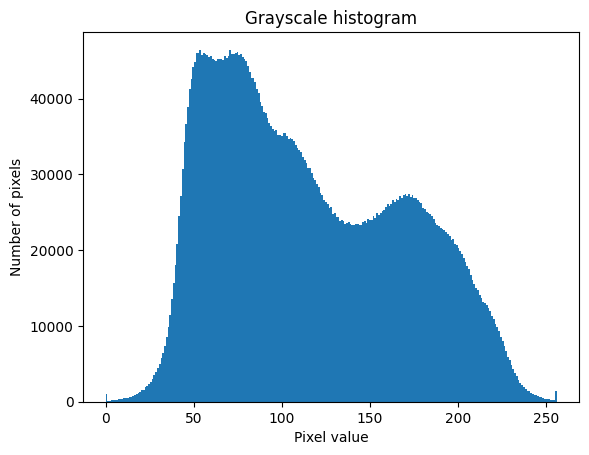

In [11]:
# create my canvas
plt.figure()

# add my histogram
plt.hist(image.flatten(), 255, [0,256])

# 255 = highest pixel value = max size of histogram
# [0,256]= range that my histogram can maximum take

# add title
plt.title("Grayscale histogram")

# add labels on axis
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

plt.show()

In [44]:
# hist
hist_blue = cv2.calcHist([image], [0], None,  [255], [0, 256])

# [0] (= blue) = color channel (BGR)
# None = mask
# [256] (= full scale) = histSize

In [45]:
hist_blue.shape # 1D numpy.array (256, 1)

(255, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

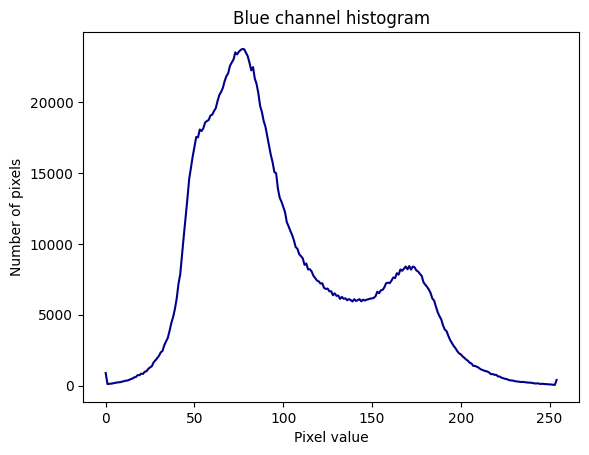

In [46]:
# Blue channel histogram

plt.figure()

plt.plot(hist_blue, color = "darkblue")

plt.title("Blue channel histogram")
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

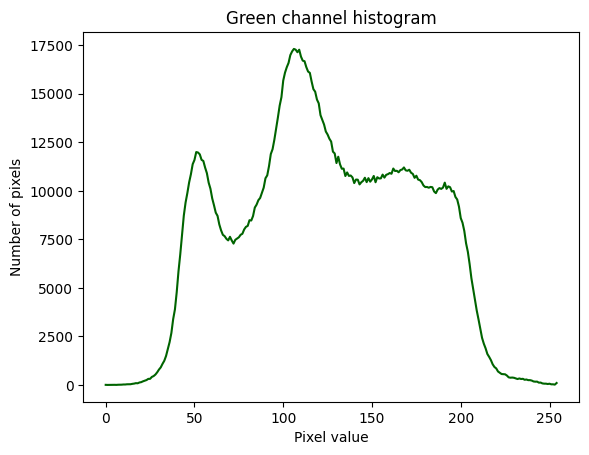

In [52]:
# Green channel histogram

hist_green = cv2.calcHist([image], [1], None,  [255], [0, 256])

plt.figure()

plt.plot(hist_green, color = "darkgreen")

plt.title("Green channel histogram")
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

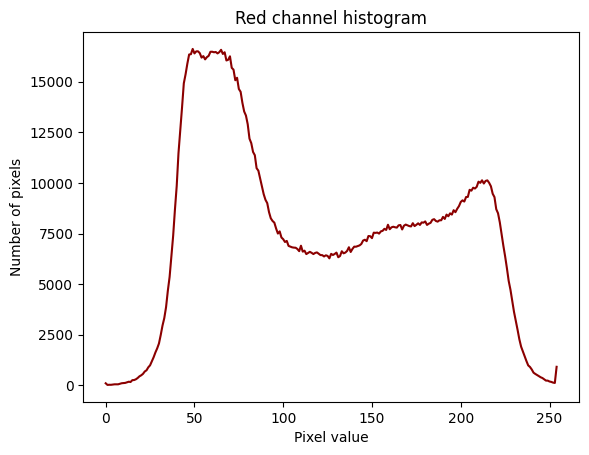

In [53]:
# Red channel histogram

hist_red = cv2.calcHist([image], [2], None,  [255], [0, 256])

plt.figure()

plt.plot(hist_red, color = "darkred")

plt.title("Red channel histogram")
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

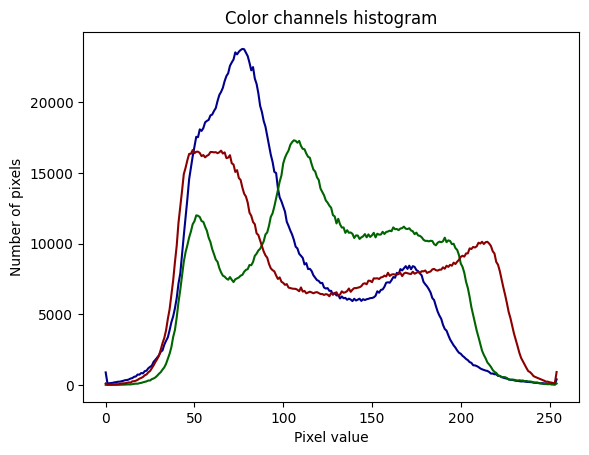

In [93]:
# Combine the three histograms
## Color channel histogram

plt.figure()

plt.plot(hist_blue, color = "darkblue")
plt.plot(hist_green, color = "darkgreen")
plt.plot(hist_red, color = "darkred")

plt.title("Color channels histogram")
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

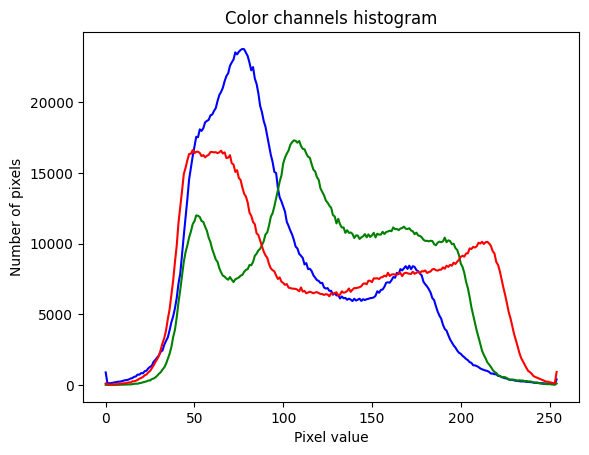

In [95]:
# Split image into color channels
## the function returns a tuple with three numpy.arrays 
channels = cv2.split(image)

# Create color tuple
colors = ("blue", "green", "red")

# Create the color channel histogram for the given image

plt.figure()

plt.title("Color channels histogram")
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")

# Initialise counter variable
i = 0

for channel in channels:
    # create hist of values for single channel
    hist = cv2.calcHist([channel], [0], None,  [255], [0, 256])
    # get plot color
    line_color = colors[i] 
    # plot histogram
    plt.plot(hist, color = line_color)
    # update counter
    # now the color will change according to the specific channel, that we loop over
    i += 1

plt.show


### Comparing histograms

In [118]:
# Load image 1
filepath_1 = os.path.join("..",
                        "..",
                        "..",
                        "cds-vis-data",
                        "data", 
                        "img",
                        "trex.png")

image_1 = cv2.imread(filepath_1)

# Load image 2

filepath_2 = os.path.join("..",
                        "..",
                        "..",
                        "cds-vis-data",
                        "data", 
                        "img",
                        "t-rex2.png")

image_2 = cv2.imread(filepath_2)

In [119]:
# Calculate histograms for both images

hist_1 = cv2.calcHist([image_1], [0,1,2], None, [255, 255, 255],  [0,256, 0,256, 0,256])
hist_2 = cv2.calcHist([image_2], [0,1,2], None, [255, 255, 255], [0,256, 0,256, 0,256])

In [120]:
# MinMax normalisation 
## norm_pixel = (value-min) / (max-min)
## For every pixel value we substract the min pixel value in the image, then divide that by the max minus the min

normalised_hist_1 = cv2.normalize(hist_1, hist_1, 0, 1.0, cv2.NORM_MINMAX)
normalised_hist_2 = cv2.normalize(hist_2, hist_2, 0, 1.0, cv2.NORM_MINMAX)

# Normalise the full histogram (so across all three color channels) where all pixel values are between 0 and 1.0
# Specify method by writing cv2.NORM_MINMAX

In [123]:
# Calculate the average distance between histogram 1 and 2
## Smaller the distance = more similar images
## Higher the distance = less similar

round(cv2.compareHist(normalised_hist_1, normalised_hist_2, cv2.HISTCMP_CHISQR), 2)

# Returns number rounded with 2 decimals
# The distance between the two images = 33.76

33.76

### Exercise 1: create and save color histograms for each of the images in the data folder

In [164]:
filepath = os.path.join("..",
                        "..",
                        "..",
                        "cds-vis-data",
                        "data", 
                        "img",
                        "*.*")

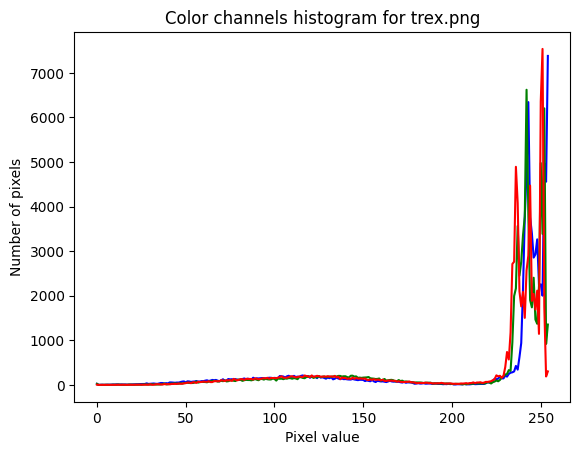

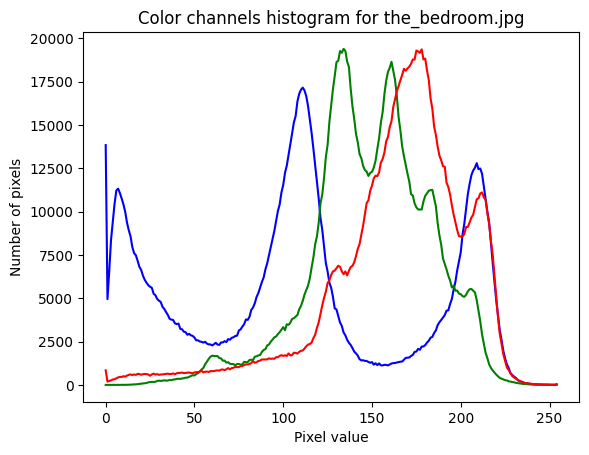

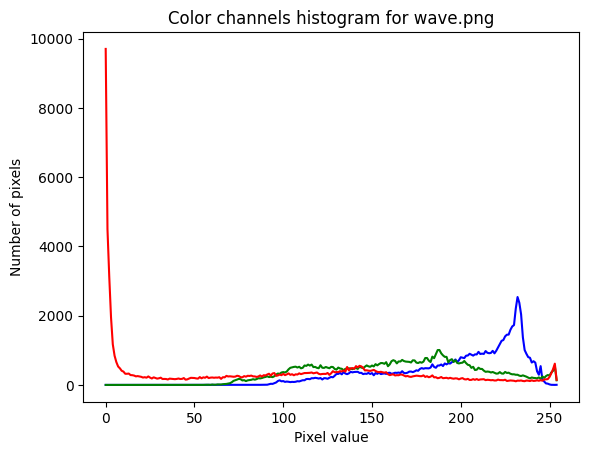

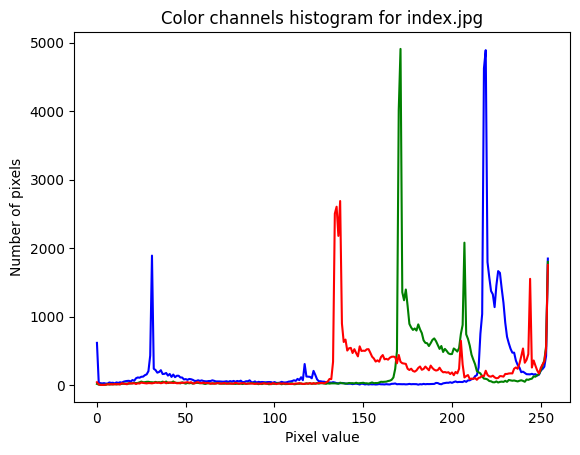

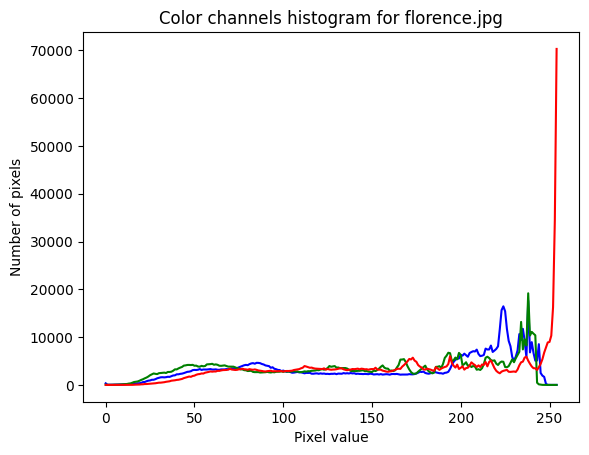

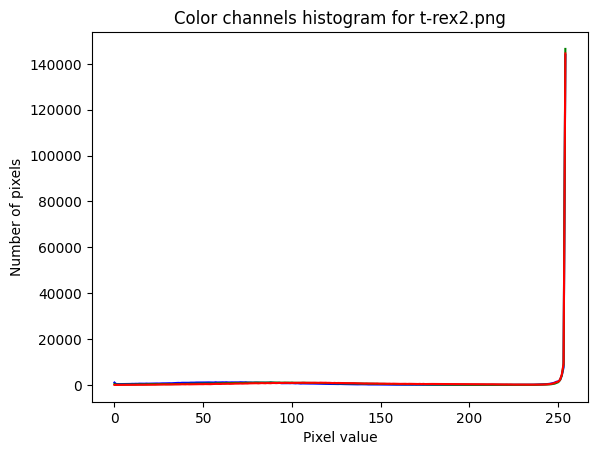

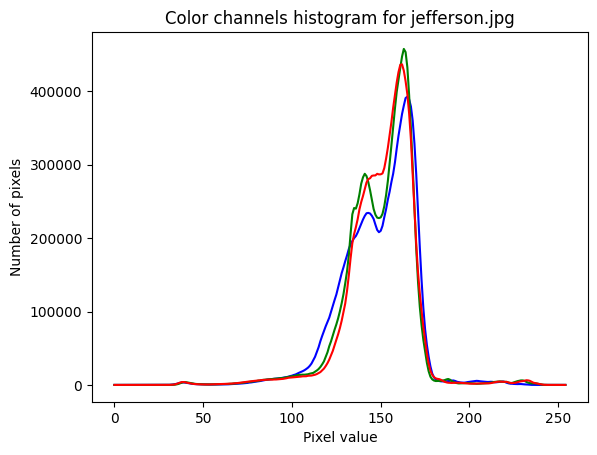

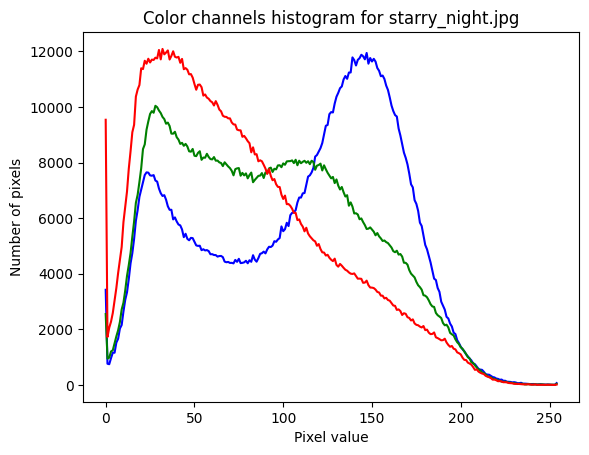

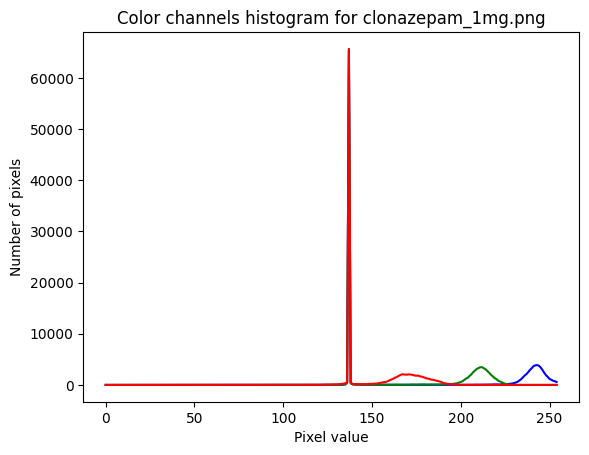

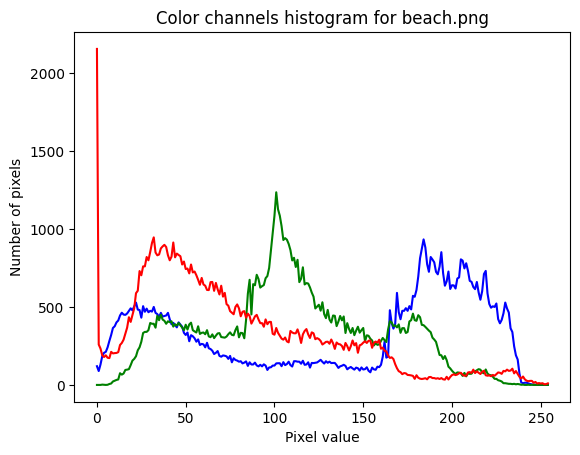

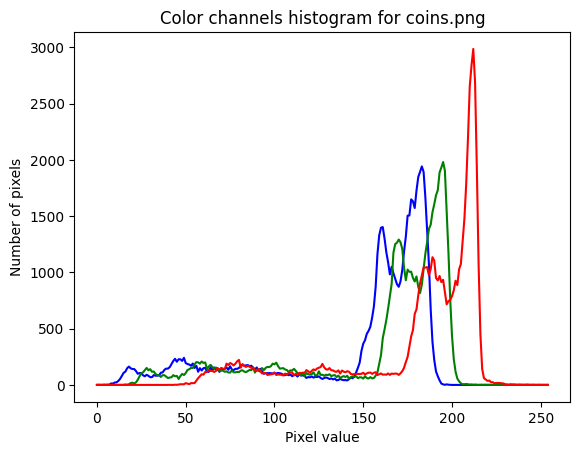

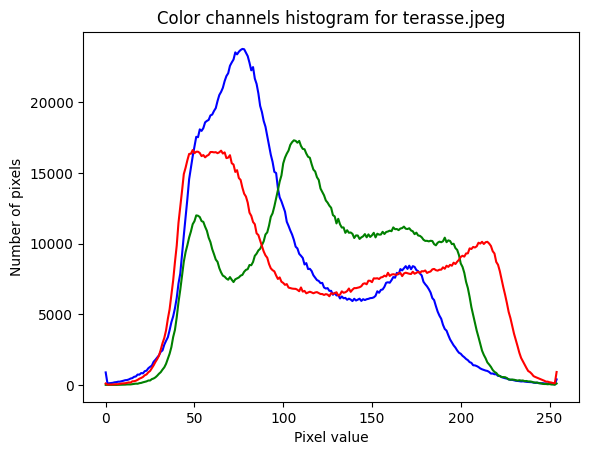

In [169]:
colors = ("blue", "green", "red")

for file in glob.glob(filepath):
    image = cv2.imread(file)

    channels = cv2.split(image)

    image_name = file.split("/")[-1]

    i = 0

    plt.figure()
    plt.title(f"Color channels histogram for {image_name}")
    plt.xlabel("Pixel value")
    plt.ylabel("Number of pixels")

    for channel in channels:
        hist = cv2.calcHist([channel], [0], None,  [255], [0, 256])
        line_color = colors[i] 
        plt.plot(hist, color = line_color)
        i += 1

    plt.savefig(f"output/histograms/{image_name}.png")

    plt.show()


### Exercise 2

- pick a random flower from the dataset, load it, and normalize it
- compare the image's color histograms to every other flower image in the dataset
- print save the filename of the 5 closest images, along with the distance score you calculated
- qualitaively inspect the images - how does your algorithm perform?
- rewrite your code as a function which takes any input filename from a user and produces the new results showing top 5 closest images for the chosen images

In [189]:
# Pick a random flower image from the dataset

flower1_filepath = os.path.join("..",
                                "..",
                                "..",
                                "cds-vis-data",
                                "flowers", 
                                "image_0001.jpg")

flower1 = cv2.imread(flower1_filepath)

In [191]:
# Calculate a histogram

flower1_hist = cv2.calcHist([flower1], [0,1,2], None, [255, 255, 255],  [0,256, 0,256, 0,256])

# Normalise the image

flower1_norm = cv2.normalize(flower1_hist, flower1_hist, 0, 1.0, cv2.NORM_MINMAX)
#flower1_norm

In [195]:
# Compare the image's color histograms to every other flower image in the dataset

flower_new_filepath = os.path.join("..",
                        "..",
                        "..",
                        "cds-vis-data",
                        "flowers", 
                        "*.*")

for file in glob.glob(flower_new_filepath):
    if file != flower1_filepath:
        
        image = cv2.imread(file)

        flower_new_hist = cv2.calcHist([image], [0,1,2], None, [255, 255, 255], [0,256, 0,256, 0,256])
        flower_new_norm = cv2.normalize(flower_new_hist, flower_new_hist, 0, 1.0, cv2.NORM_MINMAX)

        round(cv2.compareHist(flower1_norm, flower_new_norm, cv2.HISTCMP_CHISQR), 2)


In [ ]:
# Print save the filename of the 5 closest images, along with the distance score you calculated

